In [22]:
import pandas as pd

def suite_func(x) -> str:
    if x  > 0:
        return "s"
    else:
        return "n"

            
    

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
alugueis = pd.read_csv(url, sep=';')

In [2]:
alugueis.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


#### Caracteristicas gerais do nosso banco de dados

In [3]:
print(alugueis.shape,alugueis.columns)

(32960, 9) Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')


In [4]:
alugueis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


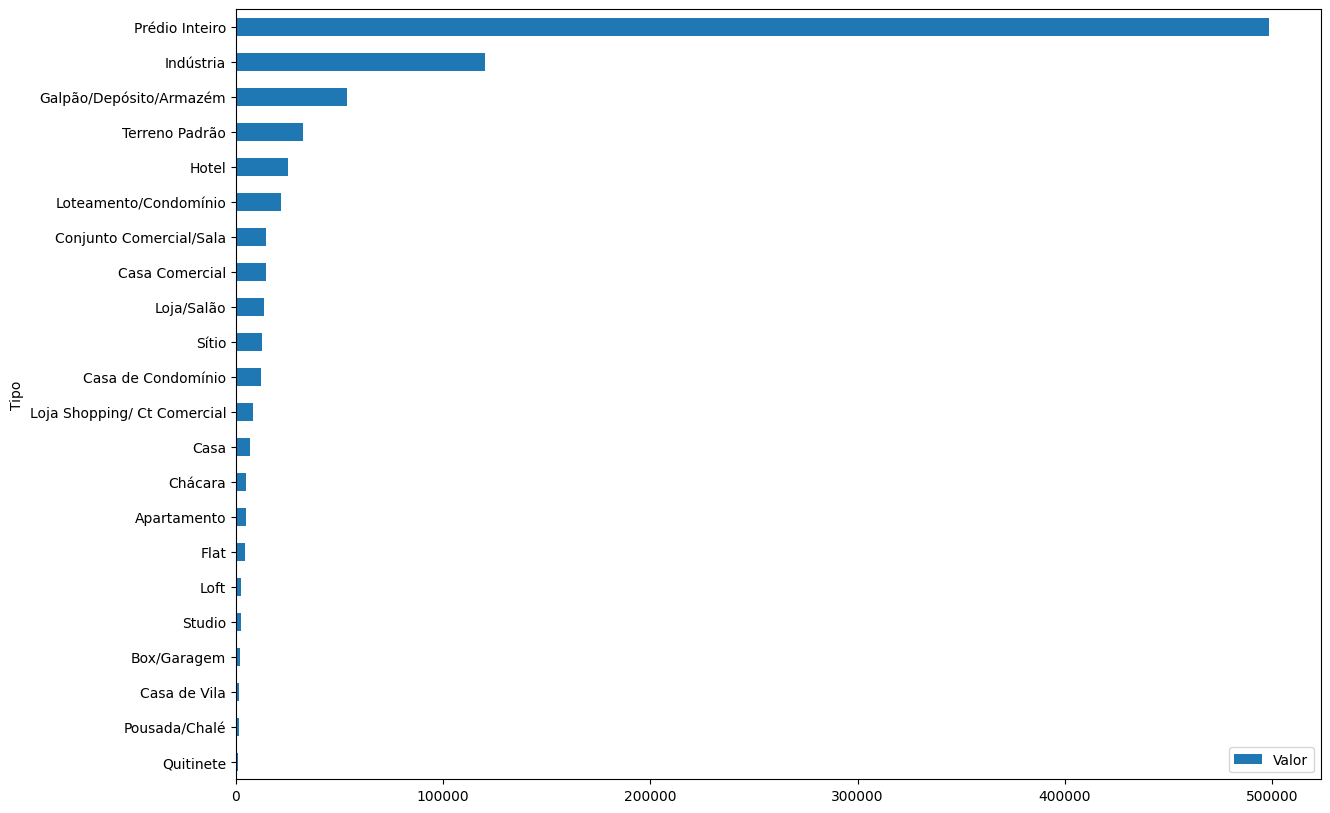

In [5]:
import matplotlib.pyplot as plt
preco_tipo = alugueis.groupby('Tipo')[['Valor']].mean().sort_values(by='Valor',ascending=True)
preco_tipo.plot(kind='barh', figsize=(14,10),legend=False)
plt.legend(loc='lower right')

In [11]:
alugueis = alugueis.fillna(0)
alugueis = alugueis.query(' Valor != 0 & Condominio != 0 & IPTU != 0') 
apartamentos = alugueis.query(' Tipo == "Apartamento" & Quartos > 0 & Quartos <= 5').copy()


In [7]:
apartamentos_plot = apartamentos.groupby(['Bairro'])[['Valor']].mean().sort_values(by='Valor',ascending=False)
apartamentos_plot.head(10)

,Valor
Bairro,
Joá,15500.000000
Cidade Jardim,12000.000000
Arpoador,11231.888889
Ipanema,9273.166667
Leblon,8531.313313
Lagoa,7964.802564
São Conrado,7846.891192
Jardim Oceânico,7114.285714
Península,6710.000000


In [14]:
alugueis.query(' Valor != 0 & Condominio != 0 & IPTU != 0')
# OU
alugueis = alugueis[(alugueis['Valor'] != 0) & (alugueis['Condominio'] != 0) & (alugueis['IPTU'] != 0)]

In [15]:
apartamentos.drop('Tipo',axis=1,inplace=True)


KeyError: "['Tipo'] not found in axis"

In [16]:
apartamentos.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0


In [17]:
alugueis.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [18]:
alugueis['Valor_mes'] = alugueis['Valor'] + alugueis['Condominio'] + alugueis['IPTU']

In [25]:
alugueis.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,n
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,s
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,n
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,n
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,n


In [24]:


alugueis['Possui_suite'] = alugueis['Suites'].apply(suite_func)